<a href="https://colab.research.google.com/github/Deleon57/EDAR-Data/blob/main/NEW_KNN(GFI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
ticker = "GFI.JO"
data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
data.head()


/tmp/ipython-input-98351610.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO
Date,,,,,
2013-01-01,9091.964844,9091.964844,9091.964844,9091.964844,0
2013-01-02,9323.320312,9325.948458,9043.769586,9151.558625,2277190
2013-01-03,9335.584961,9376.773190,9183.979586,9289.139468,1638359
2013-01-04,9049.025391,9131.400891,8955.257690,9113.874727,2154183
2013-01-07,9104.236328,9156.815800,9000.828832,9083.204345,1833898


In [185]:
data["Return"] = data["Close"].pct_change()


for lag in range(1, 6):
    data[f"Return_t-{lag}"] = data["Return"].shift(lag)

for lag in range(1, 6):
    data[f"Volume_t-{lag}"] = data["Volume"].shift(lag)

for window in [5, 10, 20]:
    rolling_mean = data["Close"].rolling(window).mean()
    rolling_std = data["Close"].rolling(window).std()
    data[f"ZScore_{window}"] = (data["Close"] - rolling_mean) / rolling_std

data["Close_SMA20"] = data["Close"] / data["Close"].rolling(20).mean()
data["High_Low"] = data["High"] / data["Low"]
data["Close_Open"] = data["Close"] / data["Open"]

data = data.dropna()
data.head()


Price,Close,High,Low,Open,Volume,Return,Return_t-1,Return_t-2,Return_t-3,Return_t-4,...,Volume_t-2,Volume_t-3,Volume_t-4,Volume_t-5,ZScore_5,ZScore_10,ZScore_20,Close_SMA20,High_Low,Close_Open
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-28,9393.425781,9407.447102,9134.030372,9231.303894,3514823,0.001776,-0.025944,0.005032,0.014856,0.006542,...,3847899.0,3311044.0,4727830.0,2970353.0,-0.789973,-0.255577,0.587264,1.011981,1.029934,1.017562
2013-01-29,9254.089844,9295.277115,9032.376819,9283.009188,3229883,-0.014833,0.001776,-0.025944,0.005032,0.014856,...,3135689.0,3847899.0,3311044.0,4727830.0,-1.247541,-1.254419,-0.196714,0.996100,1.029106,0.996885
2013-01-30,9278.623047,9371.514023,9113.872094,9269.858994,1672783,0.002651,-0.014833,0.001776,-0.025944,0.005032,...,3514823.0,3135689.0,3847899.0,3311044.0,-0.727642,-0.941263,-0.051431,0.998981,1.028269,1.000945
2013-01-31,9092.841797,9269.860703,9056.035104,9233.054985,2751840,-0.020023,0.002651,-0.014833,0.001776,-0.025944,...,3229883.0,3514823.0,3135689.0,3847899.0,-1.548170,-1.893120,-0.970415,0.980260,1.023611,0.984814
2013-02-01,9289.140625,9376.774358,9107.739197,9108.615895,5601228,0.021588,-0.020023,0.002651,-0.014833,0.001776,...,1672783.0,3229883.0,3514823.0,3135689.0,0.253950,-0.520589,0.006539,1.000127,1.029539,1.019819


In [186]:
data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

data = data.dropna()


# Feature engineering

In [187]:
train = data.loc[:'2023-12-31']
test = data.loc['2024-01-01':]

features = [
    "Close", "High", "Low", "Open", "Volume", "Return",

    "Return_t-1", "Return_t-2", "Return_t-3",

    "Volume_t-3", "Volume_t-4", "Volume_t-5",

    "ZScore_5", "ZScore_10",

    "Close_SMA20", "High_Low", "Close_Open"
]

X_train, y_train = train[features], train["Target"]
X_test, y_test = test[features], test["Target"]


In [188]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [189]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=13)

Accuracy on 2024 test set: 0.5462


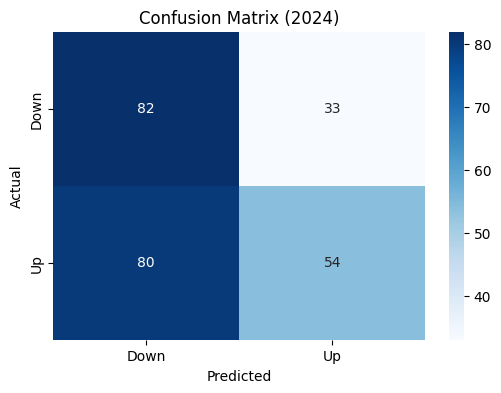


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.71      0.59       115
           1       0.62      0.40      0.49       134

    accuracy                           0.55       249
   macro avg       0.56      0.56      0.54       249
weighted avg       0.57      0.55      0.54       249



In [190]:
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on 2024 test set:", round(accuracy, 4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (2024)")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


# determine k neighbours

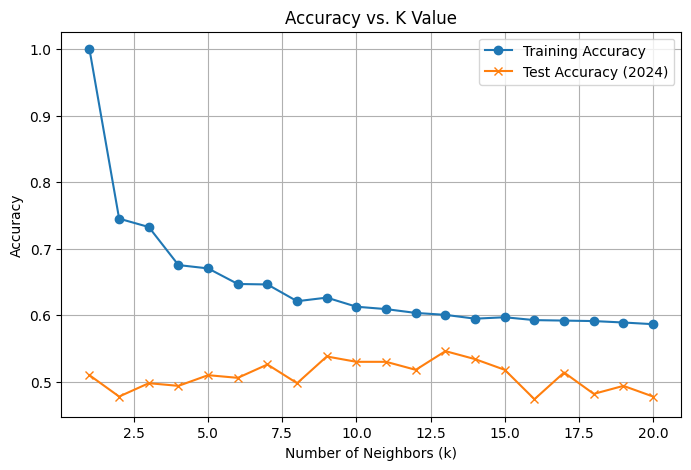

Best k = 13, with test accuracy = 0.5462


In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    train_acc.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = model.predict(X_test_scaled)
    test_acc.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(k_range, train_acc, marker='o', label='Training Accuracy')
plt.plot(k_range, test_acc, marker='x', label='Test Accuracy (2024)')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K Value")
plt.legend()
plt.grid(True)
plt.show()

best_k = k_range[test_acc.index(max(test_acc))]
print(f"Best k = {best_k}, with test accuracy = {max(test_acc):.4f}")


Feature importance (Permutation Importance):

        Feature  Importance
14  Close_SMA20    0.048193
15     High_Low    0.046586
13    ZScore_10    0.042972
5        Return    0.042169
16   Close_Open    0.039357
12     ZScore_5    0.038153
7    Return_t-2    0.026908
4        Volume    0.026104
8    Return_t-3    0.024900
6    Return_t-1    0.016064
9    Volume_t-3    0.014458
11   Volume_t-5    0.013253
10   Volume_t-4    0.009639
2           Low   -0.008434
1          High   -0.008434
0         Close   -0.010040
3          Open   -0.010442


/tmp/ipython-input-17478266.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


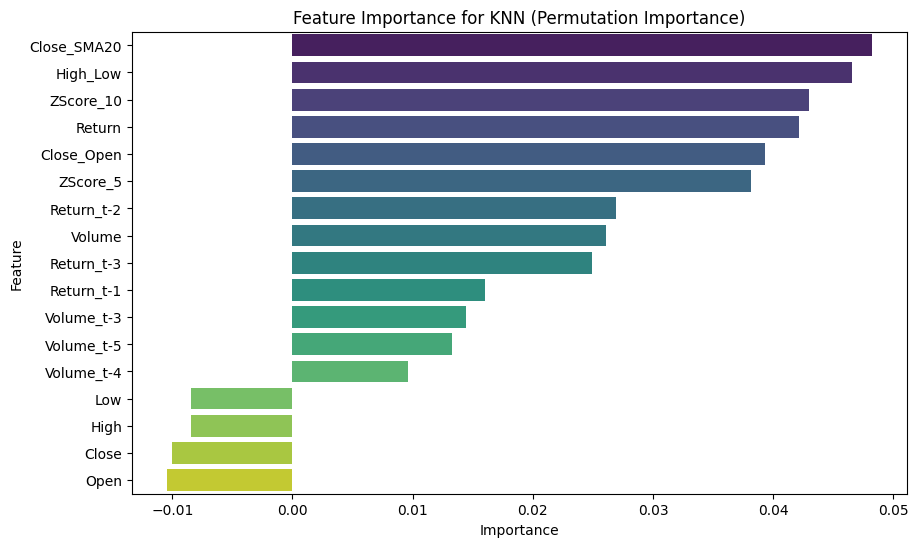

In [192]:
from sklearn.inspection import permutation_importance

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

result = permutation_importance(knn_final, X_test_scaled, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

print("Feature importance (Permutation Importance):\n")
print(importance_df)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance for KNN (Permutation Importance)")
plt.show()


# tests

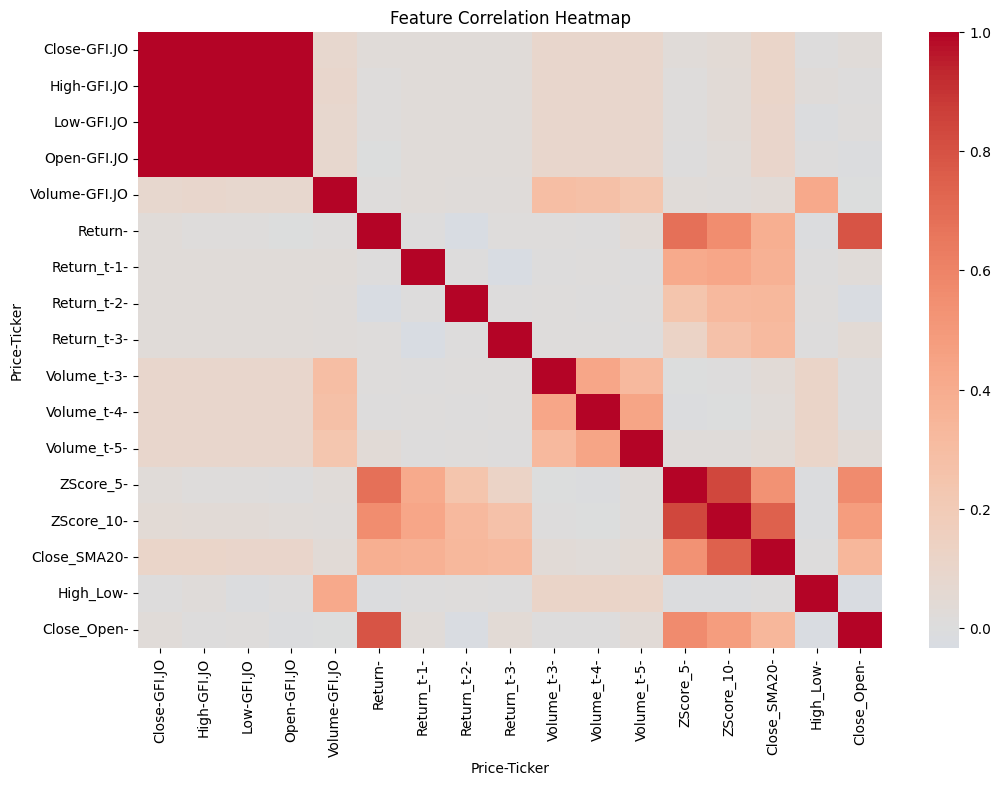


Variance Inflation Factor (VIF):
        Feature          VIF
2           Low  4631.001213
1          High  3815.104586
0         Close  3314.965720
3          Open  2965.098041
13    ZScore_10     6.100089
12     ZScore_5     5.517422
16   Close_Open     4.887030
5        Return     4.531859
15     High_Low     3.357772
14  Close_SMA20     2.754641
6    Return_t-1     1.929671
7    Return_t-2     1.530560
10   Volume_t-4     1.435372
4        Volume     1.362950
9    Volume_t-3     1.321159
8    Return_t-3     1.319234
11   Volume_t-5     1.293712

Mutual Information Scores (with Target):
        Feature  Mutual_Info
8    Return_t-3     0.014067
4        Volume     0.013801
13    ZScore_10     0.005746
16   Close_Open     0.005307
9    Volume_t-3     0.005013
5        Return     0.004883
1          High     0.003982
12     ZScore_5     0.002846
6    Return_t-1     0.002245
0         Close     0.000000
7    Return_t-2     0.000000
2           Low     0.000000
3          Open     0.000

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

plt.figure(figsize=(12,8))
corr_matrix = data[features].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

X_scaled = StandardScaler().fit_transform(data[features])  # scale before VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(len(features))]

print("\nVariance Inflation Factor (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False))

mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_df = pd.DataFrame({"Feature": features, "Mutual_Info": mi_scores})
print("\nMutual Information Scores (with Target):")
print(mi_df.sort_values(by="Mutual_Info", ascending=False))


# Learning curve

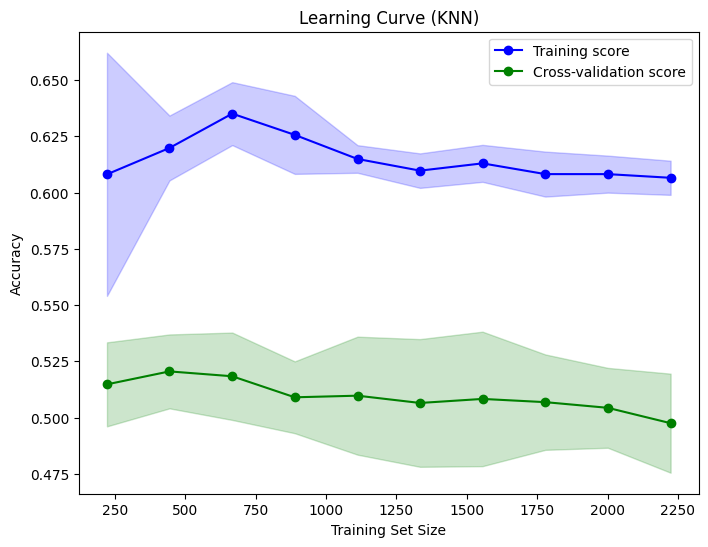

In [194]:
from sklearn.model_selection import learning_curve
import numpy as np

knn_model = KNeighborsClassifier(n_neighbors=best_k)

train_sizes, train_scores, val_scores = learning_curve(
    knn_model,
    X_train_scaled, y_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=False
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="green", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, color="green", alpha=0.2)

plt.title("Learning Curve (KNN)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()
